In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

In [1]:
# Standard example 
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import CNN, CNN_Dense
from peratouch.config import datapath_five_users

D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 1, 32) 
Shape of train set: (22462, 1, 32) 
Shape of validation set: (3964, 1, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


Test Accuracy:
Model 0: 77.3%
Model 1: 76.3%


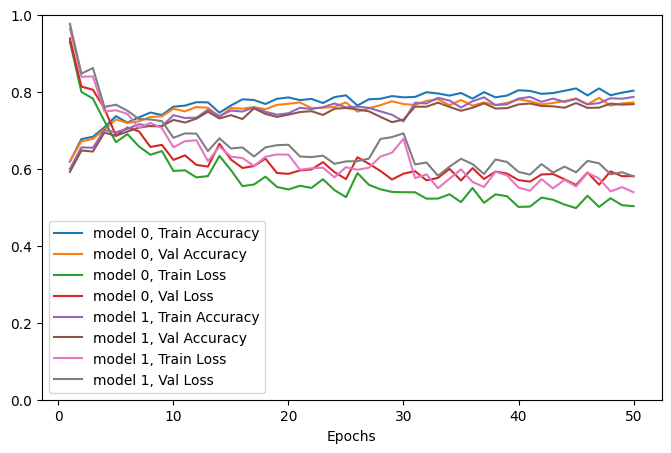

In [5]:
models = [CNN(input_ch=1, out_size=5), CNN_Dense(input_ch=1, out_size=5)]
trainers = [Trainer(D), Trainer(D)]
for model, T in zip(models, trainers):
    T.setup(model, max_epochs=50, batch_size=2*256)
    T.train_model(model)
plot_train(trainers)
test_accuracy([D, D], models)

Train, test and validation data normalized to:
[1. 1.]
[0.99839183 1.00029337]
[1.00500158 1.00545663]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 2, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 2, 32) 
Shape of train set: (22462, 2, 32) 
Shape of validation set: (3964, 2, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


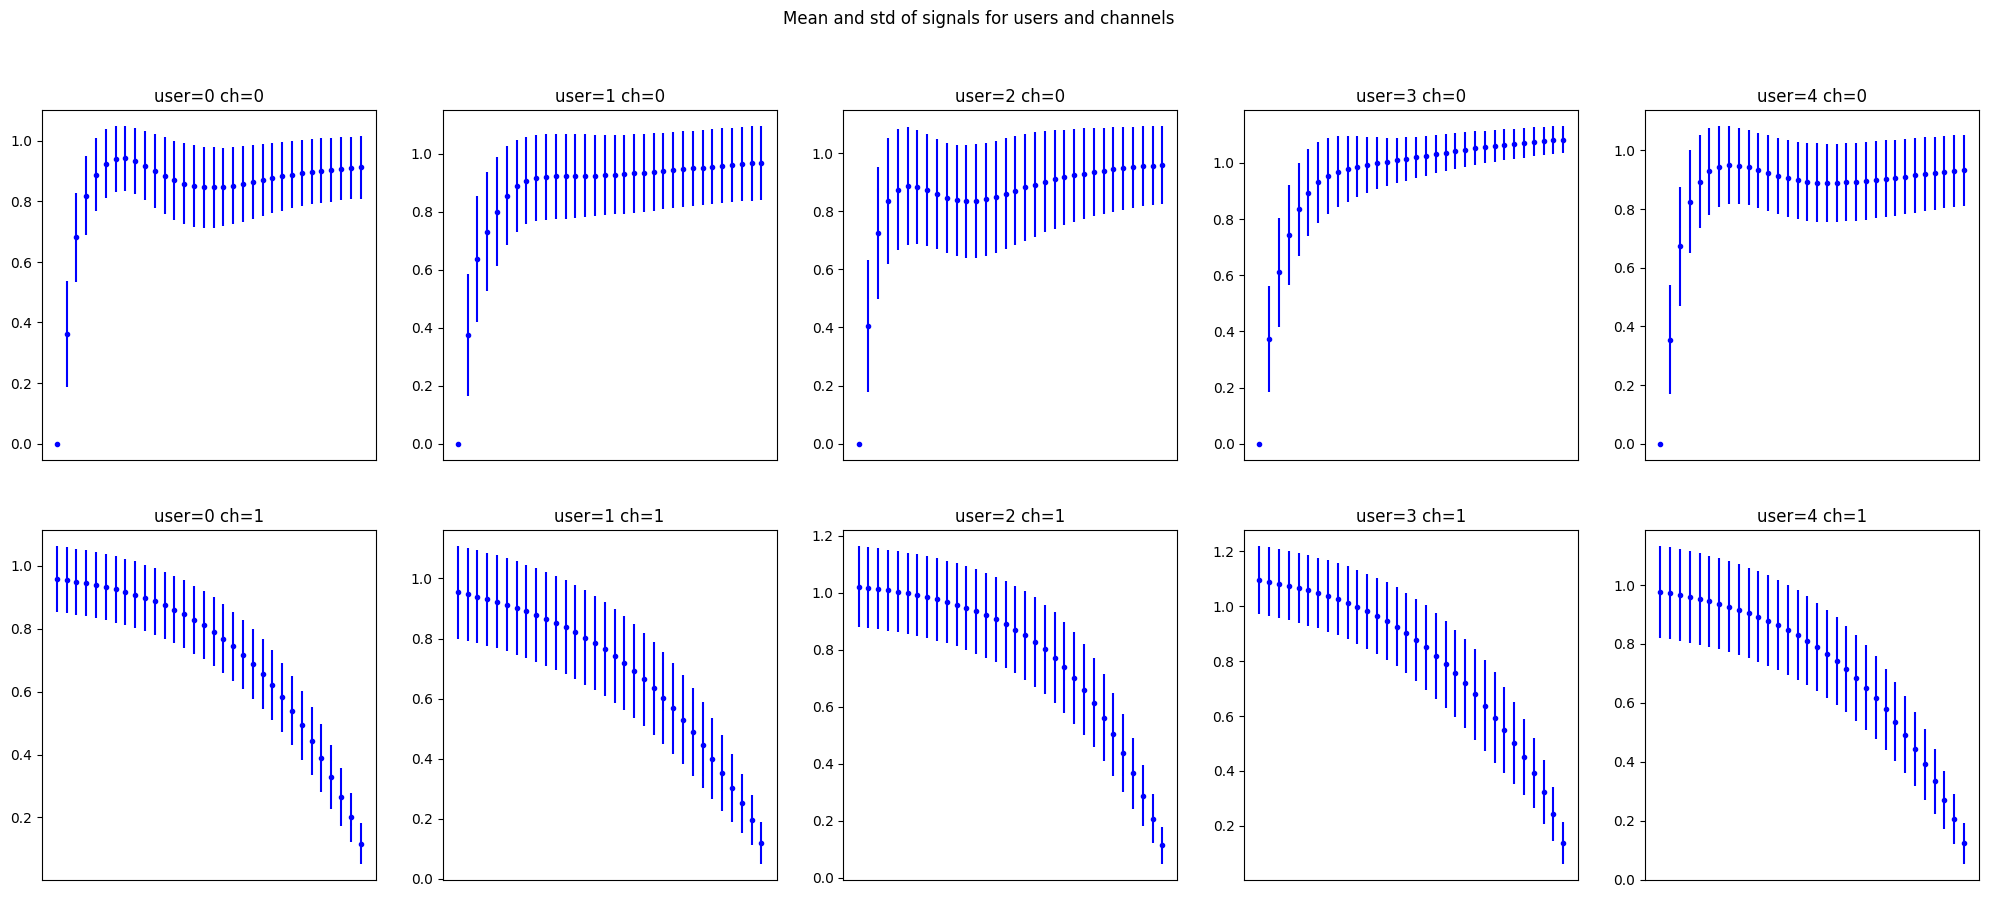

In [6]:
# Use both triggers and releases
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import CNN 
from peratouch.config import datapath_five_users
D = Data(datapath_five_users, triggers=True, releases=True)
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()
D.plot_data()

End of epoch 1:loss_tr=1.001, loss_val=1.000, train=60.0%, val=59.7%
End of epoch 2:loss_tr=0.858, loss_val=0.859, train=64.9%, val=64.7%
End of epoch 3:loss_tr=0.780, loss_val=0.791, train=69.1%, val=68.1%
End of epoch 4:loss_tr=0.740, loss_val=0.758, train=70.6%, val=69.7%
End of epoch 5:loss_tr=0.733, loss_val=0.765, train=71.3%, val=69.5%
End of epoch 6:loss_tr=0.695, loss_val=0.716, train=72.7%, val=71.4%
End of epoch 7:loss_tr=0.653, loss_val=0.673, train=74.5%, val=73.0%
End of epoch 8:loss_tr=0.632, loss_val=0.660, train=75.8%, val=74.6%
End of epoch 9:loss_tr=0.636, loss_val=0.666, train=75.6%, val=73.6%
End of epoch 10:loss_tr=0.599, loss_val=0.641, train=77.2%, val=75.4%
End of epoch 11:loss_tr=0.624, loss_val=0.665, train=75.6%, val=74.5%
End of epoch 12:loss_tr=0.606, loss_val=0.642, train=76.7%, val=74.7%
End of epoch 13:loss_tr=0.570, loss_val=0.610, train=78.3%, val=76.0%
End of epoch 14:loss_tr=0.551, loss_val=0.603, train=79.0%, val=76.7%
End of epoch 15:loss_tr=0.551

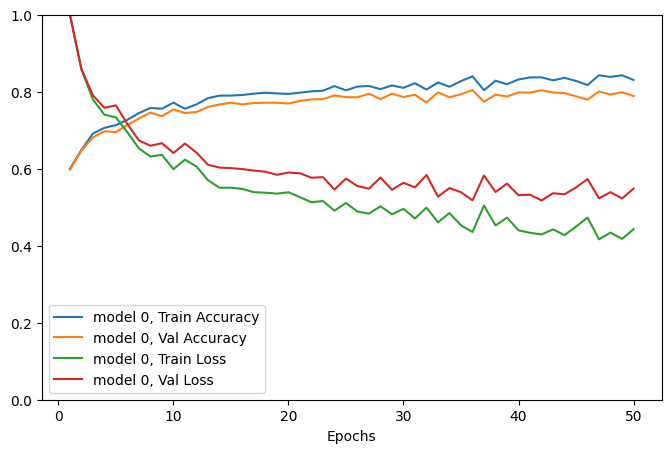

In [8]:
model = CNN(input_ch=2, n_filters=8, out_size=5)
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=50)
T.train_model(model)
plot_train([T])
test_accuracy([D], [model])

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (9328, 3, 32) 
Shape of train set: (44924, 3, 32) 
Shape of validation set: (7928, 3, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


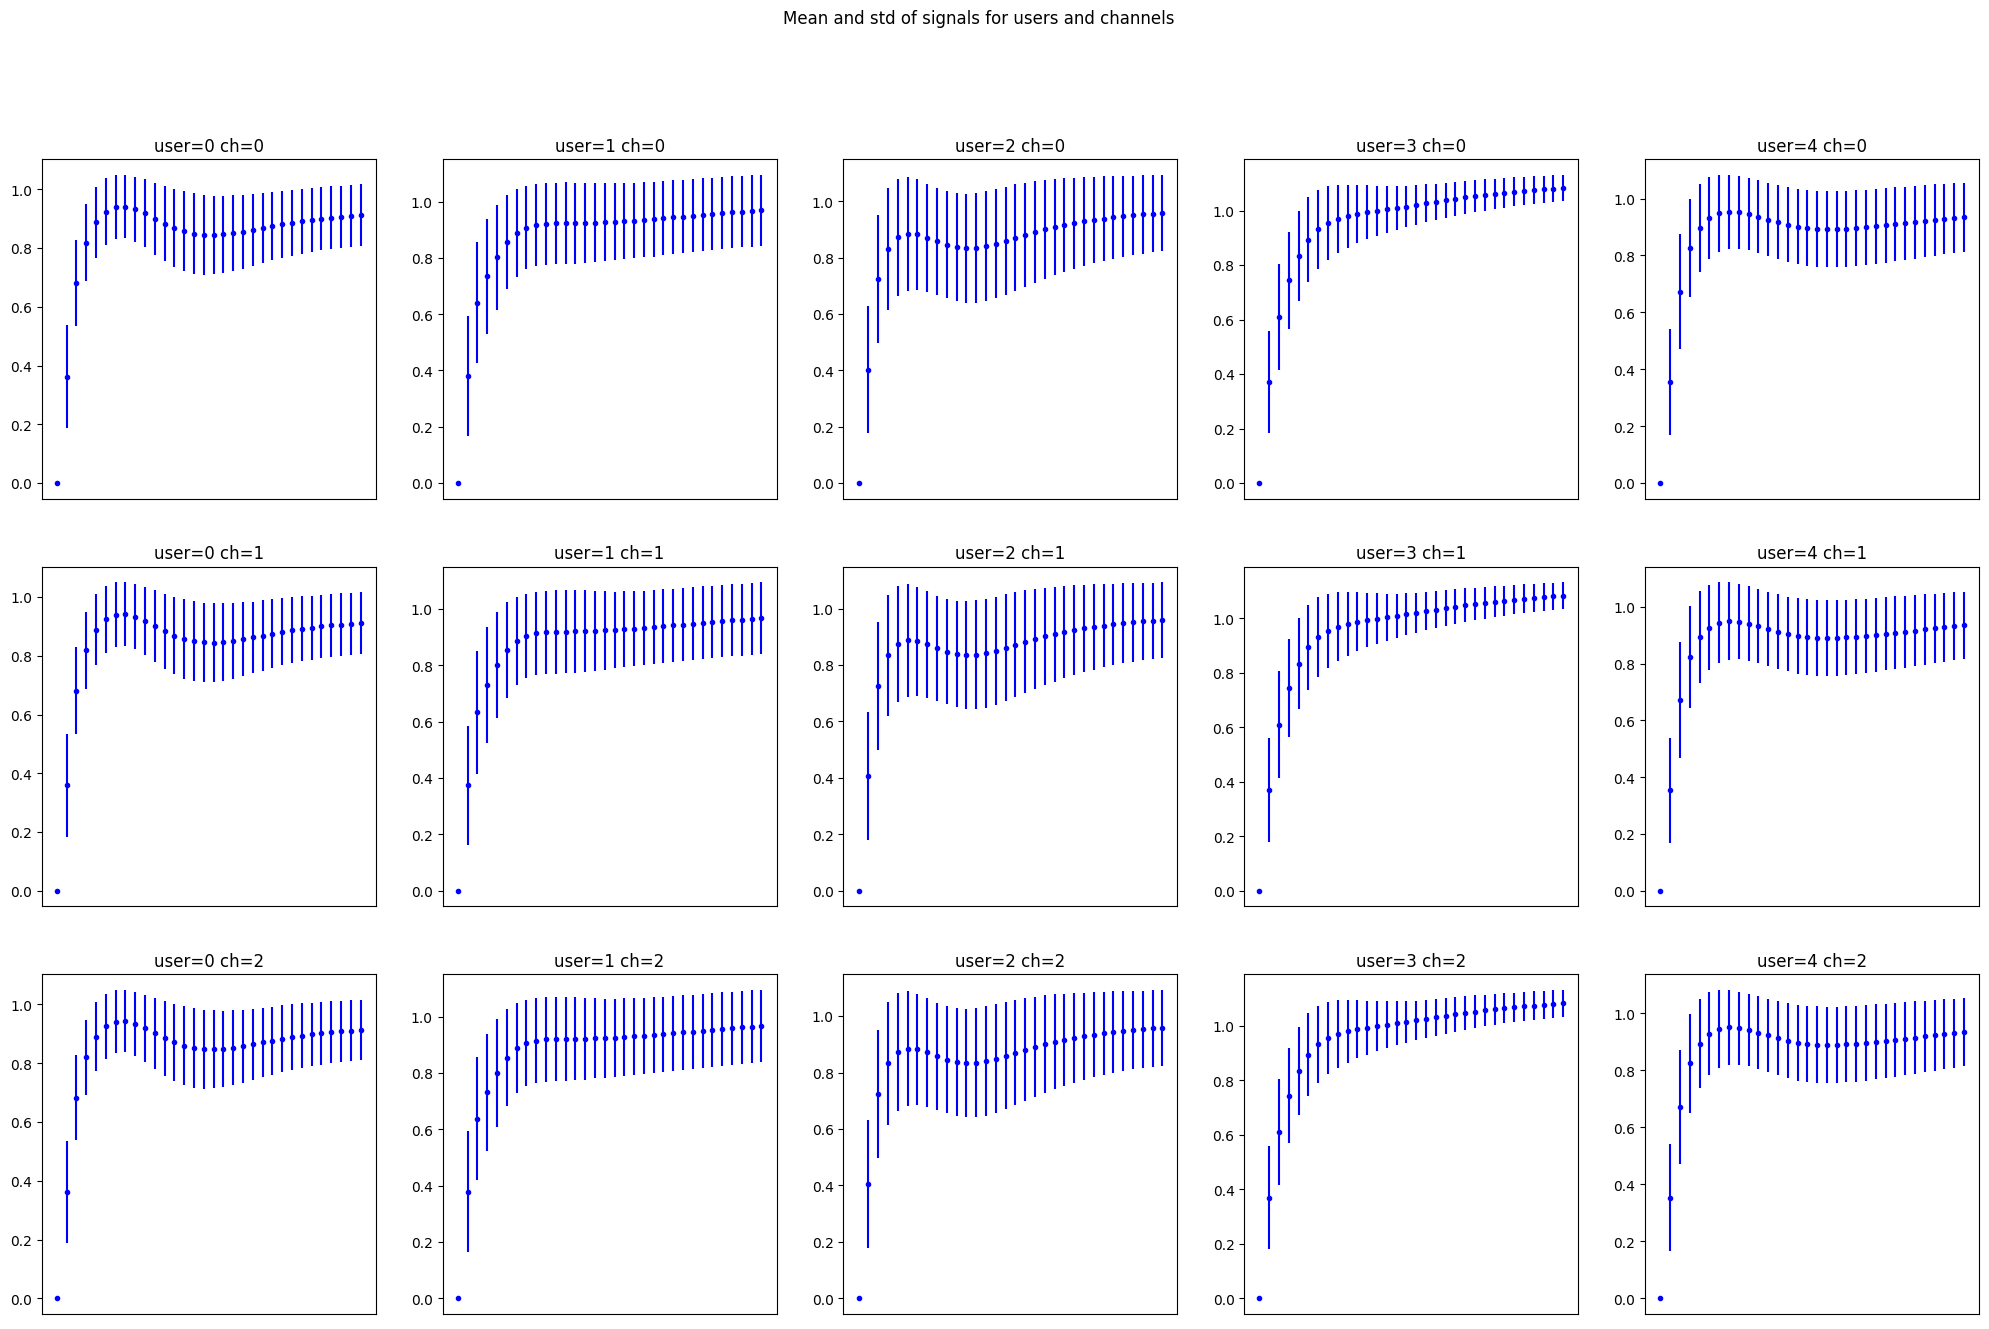

In [1]:
# Look at 3 channels
from peratouch.core_funcs import Data, Trainer, plot_train, test_accuracy
from peratouch.networks import CNN, CNN_Dense
from peratouch.config import datapath_five_users
D = Data(datapath_five_users, triggers=True, releases=False)
D.split()
D.normalize()
D.resample_random_combinations(aug_factor=2)
D.tensors_to_device()
D.print_shapes()
D.plot_data()

End of epoch 1:loss_tr=0.813, loss_val=0.819, train=67.0%, val=66.2%
End of epoch 2:loss_tr=0.578, loss_val=0.591, train=77.2%, val=76.6%
End of epoch 3:loss_tr=0.494, loss_val=0.513, train=81.0%, val=79.9%
End of epoch 4:loss_tr=0.462, loss_val=0.493, train=82.3%, val=81.5%
End of epoch 5:loss_tr=0.428, loss_val=0.453, train=83.1%, val=82.2%
End of epoch 6:loss_tr=0.393, loss_val=0.425, train=85.3%, val=83.8%
End of epoch 7:loss_tr=0.359, loss_val=0.389, train=86.5%, val=85.0%
End of epoch 8:loss_tr=0.349, loss_val=0.387, train=86.6%, val=85.6%
End of epoch 9:loss_tr=0.332, loss_val=0.368, train=87.5%, val=86.1%
End of epoch 10:loss_tr=0.322, loss_val=0.356, train=87.8%, val=86.4%
End of epoch 11:loss_tr=0.318, loss_val=0.350, train=88.0%, val=86.6%
End of epoch 12:loss_tr=0.312, loss_val=0.349, train=88.2%, val=86.6%
End of epoch 13:loss_tr=0.292, loss_val=0.325, train=89.0%, val=87.8%
End of epoch 14:loss_tr=0.286, loss_val=0.327, train=89.2%, val=87.6%
End of epoch 15:loss_tr=0.274

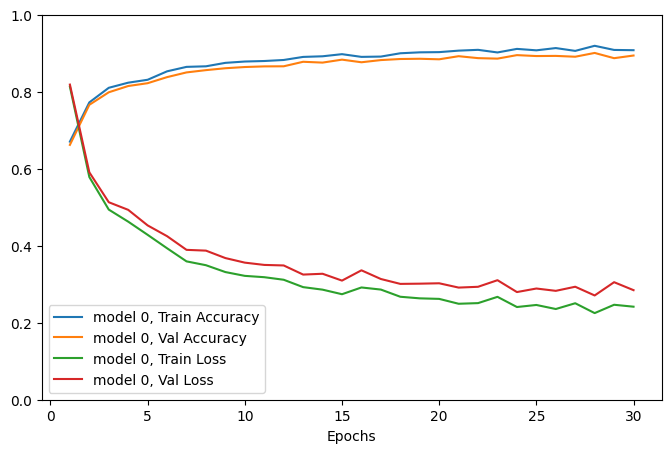

In [4]:
# Did not see any improvement by trying out CNN_Dense
model = CNN(input_ch=3, n_filters=8, out_size=5) 
T = Trainer(D) 
T.setup(model,learning_rate=1e-2, weight_decay=1e-3, max_epochs=30, batch_size=8*256)
T.train_model(model)
plot_train([T])
test_accuracy([D], [model])

In [1]:
# TODO: To look at some simple transforms, set transforms=True
# TODO: Look at longer windows of data, maybe width=64